In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('book_sales.csv', index_col='Date',parse_dates=['Date'],).drop('Paperback', axis=1)
data.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [3]:
import numpy as np

data['Time'] = np.arange(len(data.index))

data.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


Text(0.5, 1.0, 'Time Plot of Hardcover Sales')

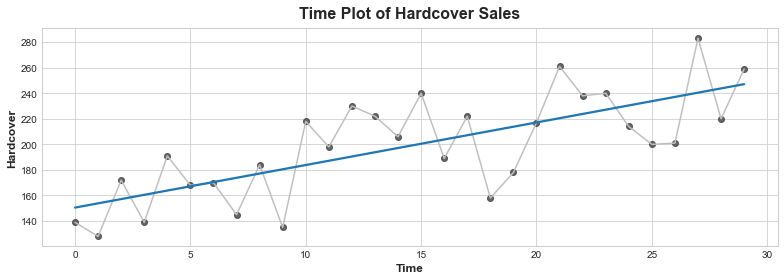

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc("figure",autolayout=True,figsize=(11,4),titlesize=18,titleweight='bold',)
plt.rc("axes",labelweight="bold",labelsize="large",titleweight="bold",titlesize=16,titlepad=10,)
%config InLineBackend.figure_foremat = 'retina'

fig, ax = plt.subplots()
ax.plot('Time','Hardcover', data=data, color='0.75')
ax = sns.regplot(x='Time',y= "Hardcover",data=data, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales')

#### Lag

In [6]:
data['Lag_1'] = data['Hardcover'].shift(1)
data = data.reindex(columns=['Hardcover', 'Lag_1'])

data.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

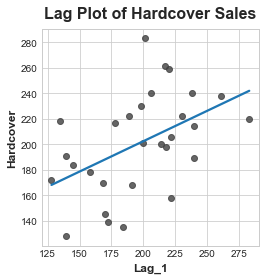

In [8]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=data, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')